In [1]:
import numpy as np
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def most_common_words(labels):
    words = []
    for lab in labels:
        words += lab.split(",")
    counter = Counter(words)
    for word in counter.most_common(300):
        print(word)

In [3]:
liste_variable = ['energy-kcal_100g',
                  'fat_100g',
                  'saturated-fat_100g',
                  'carbohydrates_100g',
                  'sugars_100g',
                  'salt_100g',
                  'fiber_100g',
                  'countries_en',
                  'categories_tags',
                  'nutriscore_grade']

In [4]:
data = pd.read_csv("./../en.openfoodfacts.org.products.csv", 
                   low_memory=False,  
                   usecols=liste_variable, 
                   encoding='utf-8', 
                   sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705429 entries, 0 to 1705428
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   categories_tags     object 
 1   countries_en        object 
 2   nutriscore_grade    object 
 3   energy-kcal_100g    float64
 4   fat_100g            float64
 5   saturated-fat_100g  float64
 6   carbohydrates_100g  float64
 7   sugars_100g         float64
 8   fiber_100g          float64
 9   salt_100g           float64
dtypes: float64(7), object(3)
memory usage: 130.1+ MB


In [6]:
data.shape

(1705429, 10)

In [7]:
data.head()

,categories_tags,countries_en,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,salt_100g
0,NaN,France,NaN,375.0,7.0,3.08,70.1,15.0,NaN,1.4
1,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"en:groceries,en:condiments,en:sauces,en:mustards",France,d,NaN,8.2,2.20,29.0,22.0,0.0,4.6
4,fr:xsf,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.dtypes.value_counts()

float64    7
object     3
dtype: int64

In [9]:
for (index, colname) in enumerate(data):
    print(f'{colname :-<50}{data[colname].nunique()}')

categories_tags-----------------------------------64450
countries_en--------------------------------------3972
nutriscore_grade----------------------------------5
energy-kcal_100g----------------------------------15903
fat_100g------------------------------------------11823
saturated-fat_100g--------------------------------8850
carbohydrates_100g--------------------------------16558
sugars_100g---------------------------------------12636
fiber_100g----------------------------------------2014
salt_100g-----------------------------------------18991


In [10]:
with pd.option_context('display.max_rows', len(data.columns)):    
    print((data.isna().sum()/data.shape[0]).sort_values(ascending=True))

countries_en          0.003187
fat_100g              0.210465
carbohydrates_100g    0.210681
sugars_100g           0.221214
salt_100g             0.234267
saturated-fat_100g    0.236167
energy-kcal_100g      0.237599
categories_tags       0.514511
nutriscore_grade      0.622172
fiber_100g            0.728170
dtype: float64


In [11]:
data['nutriscore_grade'].value_counts(normalize=True)

d    0.310825
c    0.210977
e    0.189484
a    0.161492
b    0.127221
Name: nutriscore_grade, dtype: float64

In [12]:
categ = data['categories_tags'].dropna()

In [13]:
most_common_words(categ)

('en:plant-based-foods-and-beverages', 233451)
('en:plant-based-foods', 202041)
('en:snacks', 147556)
('en:sweet-snacks', 97411)
('en:beverages', 96518)
('en:dairies', 82300)
('en:cereals-and-potatoes', 73764)
('en:meats', 64795)
('en:fruits-and-vegetables-based-foods', 64706)
('en:fermented-foods', 62837)
('en:groceries', 62631)
('en:fermented-milk-products', 62294)
('en:biscuits-and-cakes', 55517)
('en:meals', 54699)
('en:cereals-and-their-products', 48075)
('en:sauces', 43686)
('en:cheeses', 42634)
('en:confectioneries', 41511)
('en:spreads', 39613)
('en:frozen-foods', 38616)
('en:prepared-meats', 37104)
('en:plant-based-beverages', 34572)
('en:breakfasts', 34014)
('en:desserts', 33356)
('en:canned-foods', 31943)
('en:vegetables-based-foods', 30116)
('en:fruits-based-foods', 28343)
('en:seafood', 26723)
('en:biscuits', 25986)
('en:sweet-spreads', 24021)
('en:condiments', 21192)
('en:breads', 20565)
('en:fats', 19904)
('en:plant-based-spreads', 19386)
('en:fishes', 18868)
('en:canned

In [5]:
data = data[data.categories_tags.str.contains('en:beverages|en:plant-based-beverages|en:alcoholic-beverages|en:fruit-based-beverages|en:juices-and-nectars|en:carbonated-drinks|en:sodas|en:milks|en:fruit-juices|en:sweetened-beverages|en:waters|en:wines|en:milk-substitute|en:teas|en:beers|en:coffees|en:syrups|en:plant-milks|en:unsweetened-beverages|en:herbal-teas|en:wines-from-france|en:dairy-drinks|en:iced-teas|en:dehydrated-beverages|en:squeezed-juices|en:non-alcoholic-beverages|en:instant-beverages|en:mineral-waters|en:fruit-nectars|en:apple-juices|en:orange-juices|en:flavoured-syrups', regex= True, na=False)]

In [15]:
with pd.option_context('display.max_rows', len(data.columns)):    
    print((data.isna().sum()/data.shape[0]).sort_values(ascending=True))

categories_tags       0.000000
countries_en          0.002426
carbohydrates_100g    0.238003
fat_100g              0.244410
salt_100g             0.248544
sugars_100g           0.266050
energy-kcal_100g      0.282693
saturated-fat_100g    0.393409
nutriscore_grade      0.490375
fiber_100g            0.691955
dtype: float64


In [16]:
for (index, colname) in enumerate(data):
    print(f'{colname :-<50}{data[colname].nunique()}')

categories_tags-----------------------------------8797
countries_en--------------------------------------1275
nutriscore_grade----------------------------------5
energy-kcal_100g----------------------------------1680
fat_100g------------------------------------------1315
saturated-fat_100g--------------------------------1056
carbohydrates_100g--------------------------------3163
sugars_100g---------------------------------------2859
fiber_100g----------------------------------------520
salt_100g-----------------------------------------2861


In [17]:
with pd.option_context('display.max_rows', len(data)):
    print(data['countries_en'].value_counts())

France                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [6]:
data = data[data.countries_en.str.contains('France|fr|french', regex= True, na=False)]

In [19]:
with pd.option_context('display.max_rows', len(data)):
    print(data['countries_en'].value_counts())

France                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [7]:
data.shape

(48532, 10)

<AxesSubplot:>

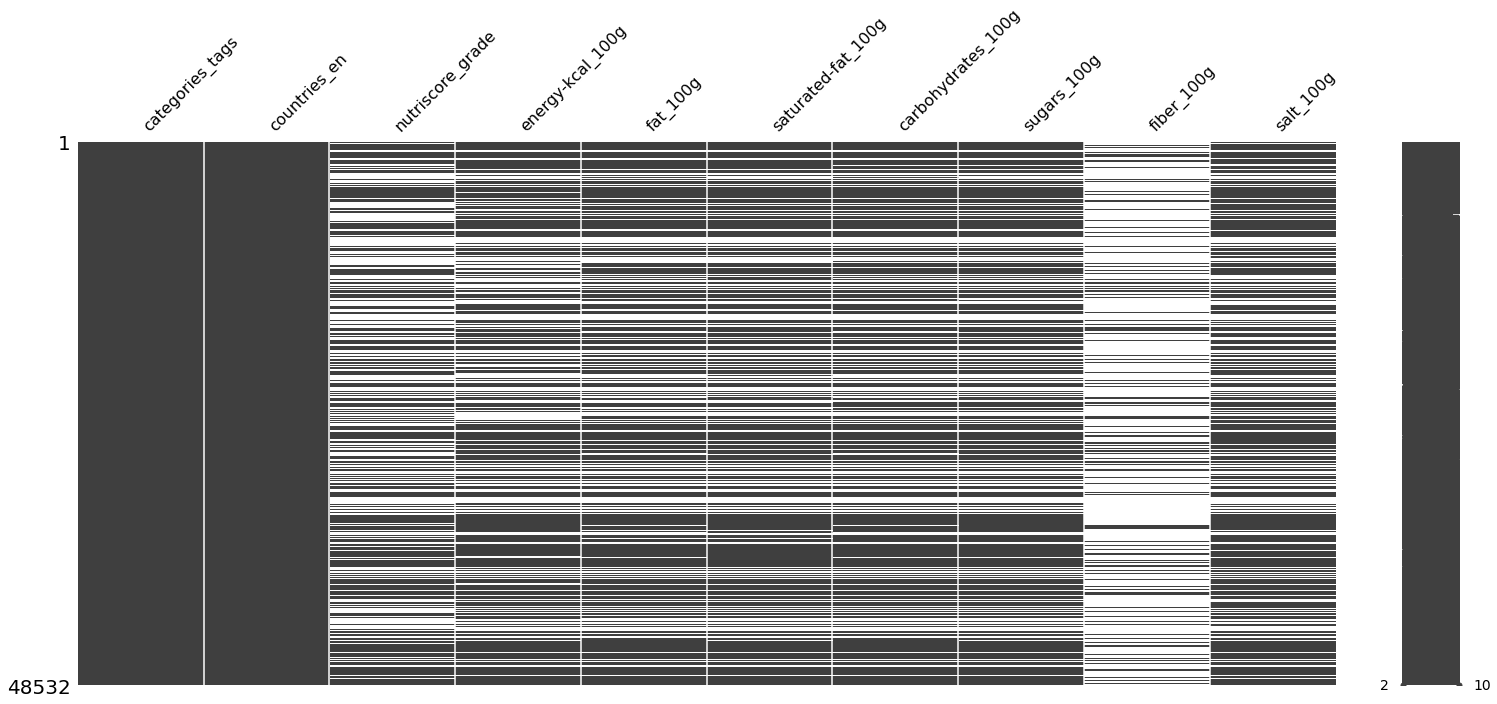

In [9]:
missingno.matrix(data) 

In [11]:
data = data.dropna(subset=['energy-kcal_100g',
                           'fat_100g',
                           'saturated-fat_100g',
                           'carbohydrates_100g',
                           'sugars_100g',
                           'salt_100g',
                           'fiber_100g',
                           'nutriscore_grade'], how = 'all')

In [12]:
data.shape

(35226, 10)

In [13]:
data.to_csv('./../dataset_nettoyer.csv',index=False)

In [26]:
data.describe()

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,salt_100g
count,31280.000000,33012.000000,33235.000000,33315.000000,33359.000000,12796.000000,32847.000000
mean,82.987572,1.155677,0.596413,15.112484,13.107034,0.965065,0.231274
std,1182.277478,4.090092,2.490885,22.463176,20.541049,4.076534,2.542879
min,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,4.100000,2.400000,0.000000,0.000000
50%,44.000000,0.030000,0.000000,8.900000,7.800000,0.000000,0.010000
75%,60.000000,0.500000,0.100000,12.000000,11.000000,0.500000,0.100000
max,208279.000000,100.000000,60.000000,107.000000,105.000000,89.000000,266.000000


<AxesSubplot:>

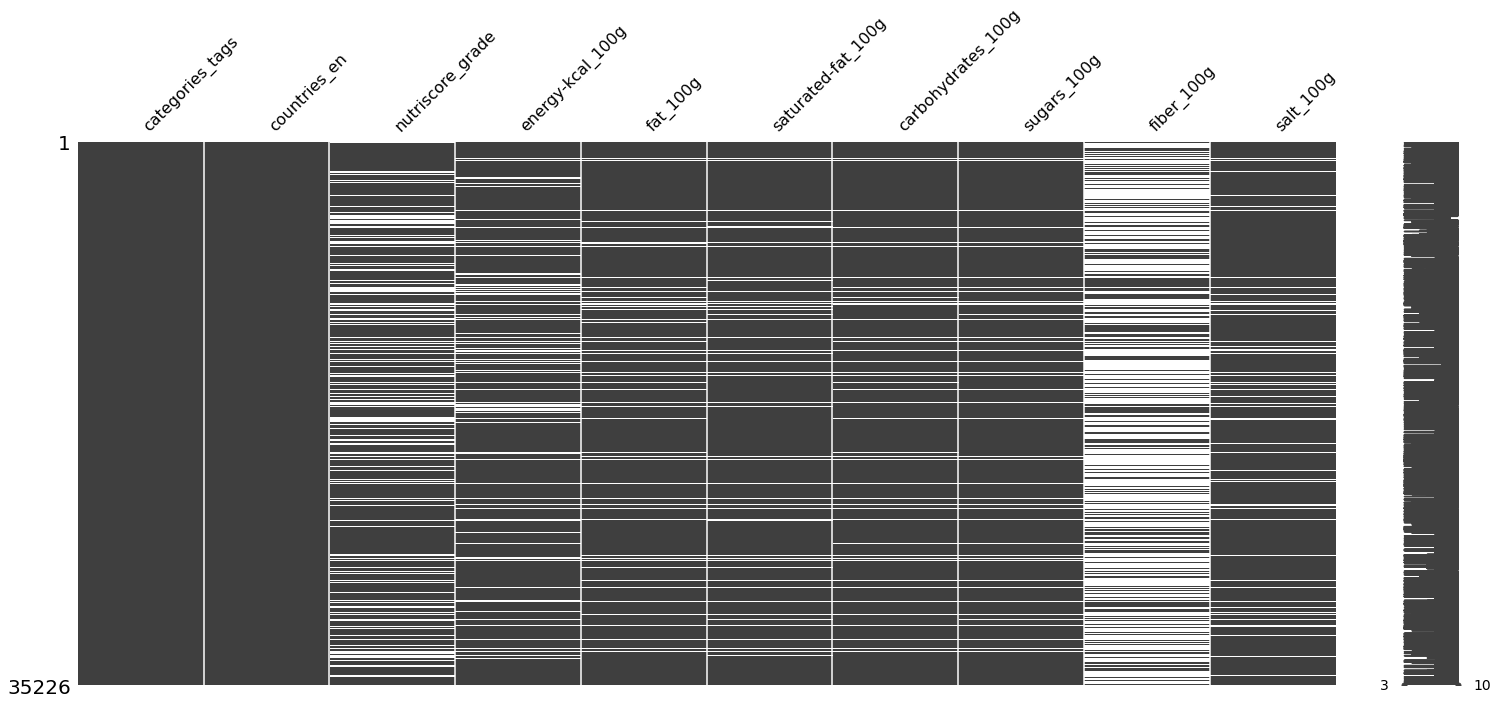

In [28]:
missingno.matrix(data)

In [31]:
data_fill_0 = data.copy()

In [32]:
data_fill_0[['energy-kcal_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','salt_100g','fiber_100g']] = data_fill_0[['energy-kcal_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','salt_100g','fiber_100g']].fillna(value=0)

In [51]:
data_fill_0.to_csv('./../dataset_nettoyer_0.csv',index=False)

In [79]:
data_fill_mean = data.copy()

In [68]:
data_fill_mean.dtypes

categories_tags        object
countries_en           object
nutriscore_grade       object
energy-kcal_100g      float64
fat_100g              float64
saturated-fat_100g    float64
carbohydrates_100g    float64
sugars_100g           float64
fiber_100g            float64
salt_100g             float64
dtype: object

In [102]:
def impute_with_mean (df):
    """Iterate through columns of Pandas DataFrame.
    Where NaNs exist replace with mean"""
    
    # Get list of DataFrame column names
    cols = list(df.loc[:, df.dtypes == np.float64])
    # Loop through columns
    for column in cols:
        # Transfer column to independent series
        col_data = df[column]
        # Look to see if there is any missing numerical data
        missing_data = sum(col_data.isna())
        if missing_data > 0:
            # Get mean and replace missing numerical data with mean
            col_mean = col_data.mean()
            col_data.fillna(col_mean, inplace=True)
            df[column] = col_data
    return df   

In [100]:
impute_with_mean(data_fill_mean)

,categories_tags,countries_en,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,salt_100g
111,"en:plant-based-foods-and-beverages,en:beverage...",France,b,221.0,0.5,0.1,0.01,0.01,0.965065,0.010000
373,"en:plant-based-foods-and-beverages,en:beverage...",France,NaN,42.0,0.0,0.0,9.95,9.67,0.965065,0.231274
403,"en:beverages,en:carbonated-drinks,en:sodas,en:...","France,United States",e,51.0,0.0,0.0,14.00,0.00,0.000000,1.000000
409,en:beverages,France,e,48.0,0.0,0.0,13.30,12.70,0.965065,0.050000
423,en:beverages,France,c,4.0,0.1,0.1,0.10,0.10,0.965065,0.001000
...,...,...,...,...,...,...,...,...,...,...
1705112,"en:plant-based-foods-and-beverages,en:beverage...",France,NaN,5.0,0.2,0.2,0.50,0.50,0.200000,0.025400
1705171,"en:plant-based-foods-and-beverages,en:beverage...",France,e,45.0,0.5,0.1,11.00,11.00,0.965065,0.010000
1705303,"en:plant-based-foods-and-beverages,en:beverage...",France,e,51.0,0.5,0.0,12.10,12.10,0.965065,0.030000
1705328,"en:plant-based-foods-and-beverages,en:beverage...",France,e,42.0,0.0,0.0,10.00,10.00,0.965065,0.000000


<AxesSubplot:>

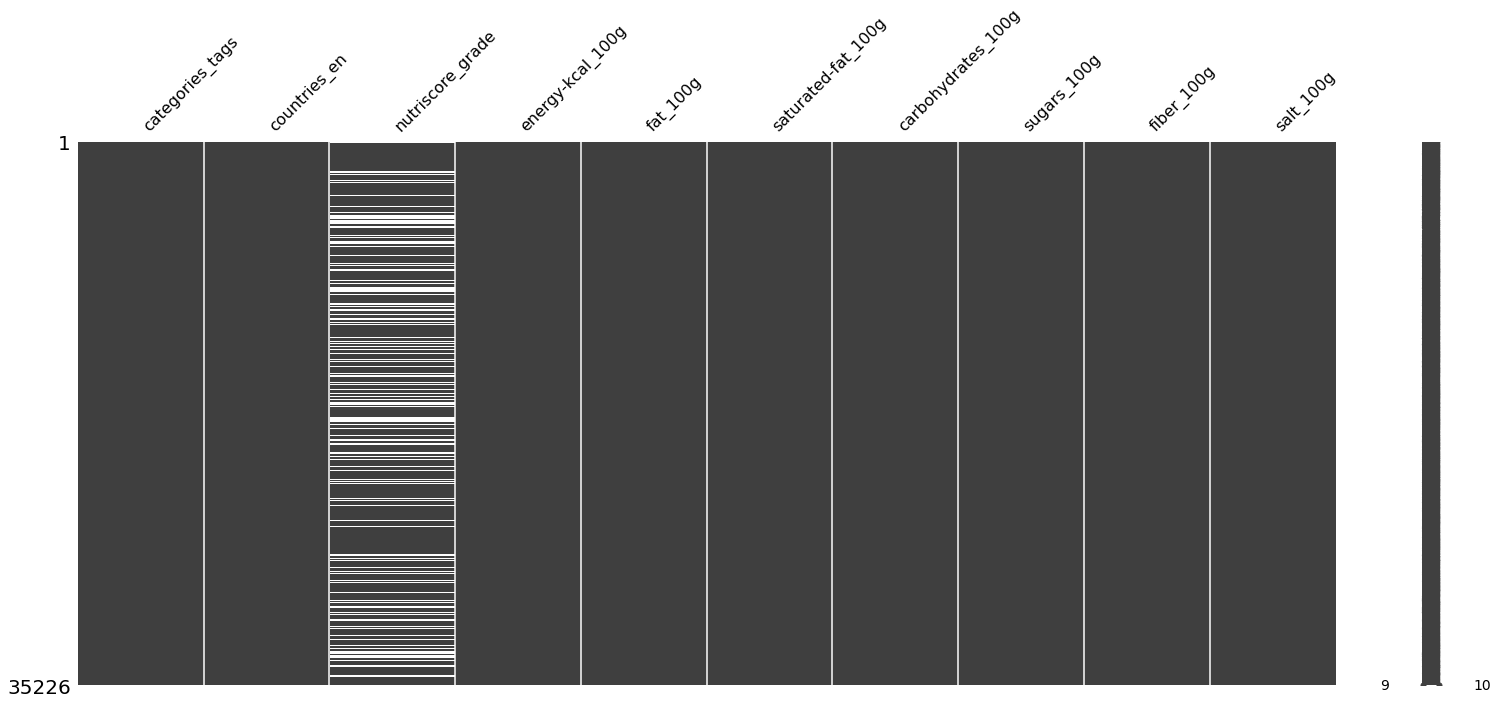

In [103]:
missingno.matrix(data_fill_mean)

In [104]:
data_fill_mean.to_csv('./../dataset_nettoyer_mean.csv',index=False)